# **Examining the Nashville Policing Dataset: Insights into Traffic Stops and Policing Strategies**


***By Niharika Patil (niharikp) and Nirvik Gill (nsgill)***

[Presentation Video Link](https://youtu.be/oOZXN2n5qgw)

**Motivation**

We are interested in uncovering the impacts of the policing strategies employed by the Nashville Police Department, to the best of our abilities. We want to explore whether focused deterrence, a specific policing strategy, contributes to crime reduction. This project holds significance as it can inform future policies and contribute to safer communities. Moreover by analyzing data and considering ethical implications, we aim to discover patterns in crime when gauged on different metrics and factors.

Not very long ago, one of the team members' friends decided to celebrate their bachelorette party in Nashville, TN. While exploring the city, the group people attending this party wanted to know how safe the city was. They were astonished to find that Nashville was one of the top 10% unsafe cities in the US. They also found out that the crime rates were worse in the 2010s. After learning about this fact, we were really interested in the government's efforts in reducing the crime rates. We found that the state/metro government employed multiple strategies to actively reduce the crime rate. One among them was focused detterance through stricter and strategic policing, like traffic stops.

**Background**:

The Metro Nashville Police Department (MNPD) has for many years employed a strategy of making large numbers of traffic stops in high crime areas as a way to address crime and violence. The strategy is thought to work in one of two ways: (a) deterring crime in the area by establishing a visible officer presence, or (b) creating opportunities for officers to identify suspects or seize contraband. While on patrol, officers are instructed to be on the lookout for potential traffic violations and—after making a stop—to be on the lookout for signs of possible criminal activity including, if appropriate, asking additional questions or seeking permission to search the car.

In a report presented to the Metro Council and other city leaders, the New York-based Policing Project says Nashville’s traffic stop rate is about four times higher than comparable cities, like Denver or New Orleans. The Policing Project says the high number of stops arise because traffic enforcement has become one of Metro Police’s main tactics for fighting crime.

There was a serious backlash in 2013, with 27 total complaints of biased-based policing against Nashville police in 2013 and 32 in 2012, according to a department report. The then ongoing debate highlighted that even though the stops rarely uncover serious violations. In fact, they’re likely to be counterproductive.

We wish to analyze how accurate the claims are, and what was the impact of the backlash.

References:
1. https://www.policingproject.org/nashville-traffic-stops

2. https://wpln.org/post/review-of-nashville-traffic-stops-casts-doubt-on-effectiveness-in-fighting-crime/


**Data**

We are using two seperate datasets for our analysis. One about policing and the other criminal incidents reported to the police. Both the datasets are massive.

Datasets Used:

1. Nashville (TN) Policing Dataset from Stanford - https://openpolicing.stanford.edu/data/

> The dataset provides comprehensive information on policing stops conducted by the Nashville Police Department, encompassing data from both local jurisdictions and state patrol stops, spanning from 2010-01-01 to 2019-03-24. Each row in the cleaned dataset represents a stop, with details extracted from various locations. Coverage varies across locations, and certain features have been removed for public release due to privacy concerns. The dataset includes both vehicular and pedestrian stops, offering insights into enforcement activities over a significant timeframe. Additionally, to ensure privacy, specific columns have been sanitized, replacing digits with "-".

https://github.com/stanford-policylab/opp/blob/master/data_readme.md



**Scope**

1. ⁠Investigate the impact of the backlash against the aggressive traffic stop policing strategy of the Nashville Police Department (PD) in the 2013 over time, with a focus on the ratio of frisks to stops, the number of arrests, and contraband hit rate.

2. ⁠Examine the effects of the law to end racial profiling by the Nashville PD in 2014 on the demographic profile of individuals stopped and arrested, utilizing policing data to analyze changes before and after the law's implementation.

3. Evaluate difference in policing strategies across geographies, and analyse if the behaviour is uniform across races in each geographical unit.



---



# **Analysis**

### **Data Preprocessing**

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
import folium
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#### Functions to be used


In [ ]:
def contraband_rate(df):
    """Number of people who were found with contraband out of people who were searched
    for input dataframe df"""
    total = df[df['search_conducted']==True].size
    contra = df[(df['contraband_found']==True) & (df['search_conducted']==True)].size
    return (contra/total)*100 if total !=0 else 0

def no_consent_search_rate(df):
    """Number of people searched without consent out of people who were searched
    for input dataframe df"""
    df = df[df['search_conducted']==True]
    total = df.size
    searched = df[df['search_basis_new']!='consent'].size
    return (searched/total)*100 if total !=0 else 0

def search_rate(df):
    """Number of people searched out of the number of people stopped
    for input dataframe df"""
    total = df.size
    searched = df[df['search_conducted']==True].size
    return (searched/total)*100 if total !=0 else 0

def frisk_rate(df):
    """Number of people frisked out of the number of people stopped
    for input dataframe df"""
    total = df.size
    frisked = df[df['frisk_performed']==True].size
    return (frisked/total)*100 if total !=0 else 0

#### *Dataset Cleaning*

Primary Dataset - Nashville Police Stops

In [ ]:
# Read dataset
#df_p = pd.read_csv('/content/drive/MyDrive/DSBD1/data/policing_nashville.csv')
df_p = pd.read_csv('nv_policing.csv')

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/1826961158.py:3: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_p = pd.read_csv('nv_policing.csv')


In [ ]:
df_p.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'precinct',
       'reporting_area', 'zone', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle', 'search_basis',
       'reason_for_stop', 'vehicle_registration_state', 'notes',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')

In [ ]:
df_policing = df_p.copy(deep= True)
df_policing.head()

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6.0,4403.0,611.0,27.0,...,False,NaN,N,False,False,False,False,False,False,False
1,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5.0,9035.0,513.0,18.0,...,True,NaN,N,False,False,False,False,False,False,False
2,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1.0,5005.0,121.0,52.0,...,False,NaN,N,False,False,False,False,False,False,False
3,233219,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3.0,8891.0,325.0,25.0,...,False,NaN,N,False,False,False,False,False,False,False
4,232780,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,21.0,...,False,NaN,N,True,True,False,False,False,False,False


In [ ]:
(df_policing.isnull().sum()/len(df_policing))*100

raw_row_number                     0.000000
date                               0.000000
time                               0.176791
location                           0.000000
lat                                6.050607
lng                                6.050607
precinct                          12.618943
reporting_area                    10.748877
zone                              12.618943
subject_age                        0.027131
subject_race                       0.059825
subject_sex                        0.414636
officer_id_hash                    0.000356
type                               0.000000
violation                          0.259350
arrest_made                        0.000905
citation_issued                    0.010348
warning_issued                     0.010898
outcome                            0.062574
contraband_found                  95.870294
contraband_drugs                  95.870294
contraband_weapons                95.870294
frisk_performed                 

In [ ]:
#looking at the different columns to identify features
df_policing.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'precinct',
       'reporting_area', 'zone', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle', 'search_basis',
       'reason_for_stop', 'vehicle_registration_state', 'notes',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')

In [ ]:
# Converting DateTime Column to DateTime
df_policing['date'] = pd.to_datetime(df_policing['date'])
df_policing = df_policing[df_policing['date']<'2019-01-01 00:00:00']
df_policing = df_policing.drop_duplicates()
# Converting boolean columns from object dtype to boolean dtype
bool_cols = ['arrest_made', 'citation_issued', 'warning_issued','contraband_found',
    'contraband_drugs', 'contraband_weapons','frisk_performed', 'search_conducted',
    'search_person','search_vehicle','raw_verbal_warning_issued','raw_written_warning_issued',
    'raw_traffic_citation_issued','raw_driver_searched', 'raw_passenger_searched',
    'raw_search_consent','raw_search_arrest', 'raw_search_warrant', 'raw_search_inventory',
    'raw_search_plain_view']
df_policing[bool_cols] = df_policing[bool_cols].replace({False: 0, True: 1})



/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/1228801168.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_policing[bool_cols] = df_policing[bool_cols].replace({False: 0, True: 1})


In [ ]:
for col in bool_cols:
    df_policing[col] = df_policing[col].fillna(0)

In [ ]:
# Removing all the raw columns from the dataset
raw_cols = [col for col in df_policing.columns if 'raw' in col]
df2 = df_policing.drop(columns=raw_cols)

In [ ]:
df_policing[bool_cols] = df_policing[bool_cols].astype(bool) # Changes the boolean values for the columns, why is it happening

In [ ]:
print(df2['search_basis'].unique()) # Checking unique values of search basis
print(len(df2[df2['search_basis'].isna()])) # Checking number of nan values

[nan 'probable cause' 'plain view' 'consent' 'other']
2950994


**Since alot (2,964,644) of the values for search basis are nan we will create a new search basis column with the nans labeled as 'no_search_basis'**

In [ ]:
df2['search_basis_new'] = df2['search_basis']
df2['search_basis_new'] = df2['search_basis_new'].fillna('not reported') # Change to not reported
df2['search_basis_new'].unique()

array(['not reported', 'probable cause', 'plain view', 'consent', 'other'],
      dtype=object)

In [ ]:
df2.arrest_made.fillna(0,inplace=True)
df2.arrest_made.unique()

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/3101638958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.arrest_made.fillna(0,inplace=True)


array([0., 1.])

In [ ]:
df2['year'] = df2['date'].dt.strftime('%Y')

In [ ]:
df2.year.unique()

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'], dtype=object)



---



### **Part 1. Analysis of Traffic Stops in Nashville over Time**


**Question**: What was the impact of the 2013 backlash against the aggressive traffic stop policing strategy of the Nashville Police Department (PD) over time?

**Methodology and Analysis**
We try to answer this umbrealla question by breaking it down into further smaller questions:

1. What trends can be observed in the number of overall traffic stops performed by the Nashville Police Department over time?

2. What patterns emerge in the frequency of frisks conducted during traffic stops over time?

3. How have the searches conducted during traffic stops varied over time?

4. What are the trends in the number of arrests resulting from traffic stops over the years?

5. What patterns can be seen in the seizure of contraband from traffic stops over time?

To answer these question, we use the number of stops and the metrics defined below:



*   Frisk Rate: Ratio of number of frisks conducted to total stops
- Search Rate: Ratio of number of searched conducted to total stops
*   Contraband Hit Rate: Number of units of contraband found per seach



**Hypothesis**: We except to see a decrease in the number of stops and frisks, after around 2013 as a consquence of the frisk policy. We hope to see the contraband hit rate and arrests rate to have increase over years, indicating that several of these stops made did not lead to substantial outcomes.

In [ ]:
drop_null_df = df2.copy(deep=True)

#### *Temporal Analysis of Traffic Stops*

In [ ]:
drop_null_df['year'] = drop_null_df['year'].astype(str)

highlighted_years = ['2012', '2013']

year_stop_counts = drop_null_df.groupby('year').size().reset_index(name='count_stops')

year_stop_counts['highlight'] = year_stop_counts['year'].isin(highlighted_years)

chart = alt.Chart(year_stop_counts).mark_bar().encode(
    x=alt.X('year:O', title= 'Year', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('count_stops:Q', axis=alt.Axis(title='Total Traffic Stops')),
    # Use conditional color based on the 'highlight' column
    color=alt.condition(
        alt.datum.highlight,  # If true (year is highlighted)
        alt.value('#f88'),  # Use highlight color
        alt.value('lightgray')  # Else use default color
    ),
    tooltip=['year', 'count_stops']
).properties(
    title='Number of Traffic Stops per Year',
    width=600,
    height=400
)

chart.display()


/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
year_stop_counts.describe()

,count_stops
count,9.000000
mean,342012.888889
std,82628.103700
min,204217.000000
25%,297248.000000
50%,357261.000000
75%,412695.000000
max,444146.000000


**We can see from the above visualization that the number of traffic stops was the highest in 2012 and reduced in 2013 and remained the same in 2014. The number eventually start decreasing more steeply, with almost half as many stops in 2018 than 2013. We can observe a "delayed" effect of the backlash on actually reducing the stops.**

#### *Analysis of Frisks*

In [ ]:

year_counts_frisk = drop_null_df[drop_null_df['frisk_performed'] == True].groupby('year').size().reset_index(name='frisk_counts')


bar_chart_a = alt.Chart(year_counts_frisk).mark_bar(color='lightgray').encode(
    x=alt.X('year:O', title= 'Year', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('frisk_counts:Q', axis=alt.Axis(title='Total Frisks Conducted')),
    tooltip=['year', 'frisk_counts']
).properties(
    title='Number of Frisks per Year',
    width=500,
    height=400
)

line_chart_a = alt.Chart(year_counts_frisk).mark_line(color='red').encode(
    x='year:O',
    y='frisk_counts:Q'
)

# Layering charts
final_chart_a = alt.layer(bar_chart_a, line_chart_a).properties(
    width=500,
    height=400
)


#annual frisk rates
annual_stop_frisk_df = pd.merge(year_counts_frisk, year_stop_counts, on='year')

#calculating the first-to-stop ratio for each year
annual_stop_frisk_df['frisk_to_stop_perentage'] = annual_stop_frisk_df['frisk_counts'] * 100 / annual_stop_frisk_df['count_stops']

line_chart_b = alt.Chart(annual_stop_frisk_df).mark_line(point=True, color = 'gray').encode(
    x= alt.X('year:O', title= 'Year', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('frisk_to_stop_perentage:Q', axis=alt.Axis(title='Frisk-to-Stop in %')),
    tooltip=['year', 'frisk_to_stop_perentage']
).properties(
    title='Frisk-to-Stop Percentage Over Years',
    width=500,
    height=400
)

ref_years_df = pd.DataFrame({'Year': ['2013']})

# reference lines
ref_lines = alt.Chart(ref_years_df).mark_rule(color='red', strokeWidth=1, strokeDash=[5, 5]).encode(
    x='Year:O',
).properties(
    width=500,
    height=400
)

# Combine the line chart with reference lines
final_chart_b = (line_chart_b + ref_lines).properties(
    width=500,
    height=400
)

# side-by-side display of charts
final_chart_a | final_chart_b


/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

**Key Takeaways**
- The number of frisks have reduced significantly since 2011, but has remained almost constant for the years 2017 and 2018.
- There is a sharp increase in the year 2011. It might be due to the stricter policing strategies. Which provides an interesting avenue for further analysis; was there a higher number of searches conducted, arrests made and contraband seized?
- There is a general downward trend in the number of frisks performed over the years. However, there have been in the ratio for the years 2013 and 2018.
- Even though the frisks performed in 2011 was very high, the ratio of the frisks performed to the stops made was higher than 2010. This could mean that the policy for more focused on increasing traffic stops, and not particularly focused toward increasing the frisks performed.
- The backlash to the policing strategies in 2013 seem to have some correlation with the number of frisks conducted as well.

#### *Analysis of Arrests*

In [ ]:
drop_null_df['is_arrested'] = drop_null_df['arrest_made'].astype(int)
total_stops = drop_null_df.groupby('year').size().reset_index(name='counts')
total_stops['category'] = 'Total Stops'

arrests_made = drop_null_df.groupby('year')['is_arrested'].sum().reset_index(name='counts')
arrests_made['category'] = 'Arrests Made'

combined_data = pd.concat([total_stops, arrests_made], ignore_index=True)

base = alt.Chart(combined_data).encode(
    x=alt.X('year:O', title= 'Year', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('counts:Q', axis=alt.Axis(title='Counts')),
    color=alt.Color('category:N', scale=alt.Scale(domain=['Total Stops', 'Arrests Made'],
                                                  range=['lightgray', 'firebrick'])),
    tooltip=['year', 'counts']
)

bar_chart = base.mark_bar().encode(
    x=alt.X('year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('counts:Q', axis=alt.Axis(title='Counts'))
).properties(
    title='Arrests Made Over Years',
    width=500,
    height=400
)


ratio_data = total_stops.copy(deep = True)
ratio_data['arrests_made'] = arrests_made['counts']
ratio_data['arrest_percentage'] = ratio_data['arrests_made'] * 100 / ratio_data['counts']

line_chart = alt.Chart(ratio_data).mark_line(point=True, color='gray').encode(
    x=alt.X('year:O', title= 'Year', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('arrest_percentage:Q', axis=alt.Axis(title='Arrest Ratio')),
    tooltip=['year', 'arrest_percentage']
).properties(
    title = 'Arrests to Stop over Years',
    width=500,
    height=400
)

ref_years_df = pd.DataFrame({'Year': ['2013']})

ref_lines = alt.Chart(ref_years_df).mark_rule(color='red', strokeWidth=1, strokeDash=[5, 5]).encode(
    x='Year:O',
).properties(
    width=500,
    height=400
)

final_chart = (line_chart + ref_lines).properties(
    width=500,
    height=400
)

bar_chart | final_chart


/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/a

alt.HConcatChart(...)

- This graph shows the number of arrests made have decreased over time, following the trend of the decrease in number of traffic stops over all.
- There could be reasons like decrease in street crime leading to this result.

The above is a plot of the ratio of the number of traffic stops leading to arrests to the total number of stops made. As we see the ratio decrease through **2013**, indicating that the a **lot of these traffic stops made did not lead to any kind of arrests**. We could see the ratio increase from 2014. Around this time, the traffic stops had reduced. The higher ratio could indicate that the hit rate for arrests were high, implying that the reduce in traffic stops did not impact the arrests made. Another question that pops at this point is what is the nature of these arrests, and if there was any kind of disparity in the arrests made.

#### *Ananlysis of Searches Conducted and Contrabands Seized*

In [ ]:
drop_null_df['is_search_conducted'] = drop_null_df['search_conducted'].astype(int)

seaches_made = drop_null_df.groupby('year')['is_search_conducted'].sum().reset_index(name='counts')
seaches_made['category'] = 'Search Conducted'

bar_chart = alt.Chart(seaches_made).mark_bar().encode(
    x=alt.X('year:O', title= 'Year', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('counts:Q', axis=alt.Axis(title='Number of Searches Conducted')),
    color=alt.condition(
        alt.datum.year == '2012',
        alt.value('#f88'),
        alt.value('lightgray')
    ),
).properties(
    title = 'Searches Conducted per Year',
    width=500,
    height=400
)

total_stops = drop_null_df.groupby('year').size().reset_index(name='total_counts')
ratio_data = seaches_made.copy(deep = True)
ratio_data['total_counts'] = total_stops['total_counts']
ratio_data['percentage'] = ratio_data['counts']*100 / ratio_data['total_counts']

line_chart = alt.Chart(ratio_data).mark_line(point=True, color = 'gray').encode(
    x=alt.X('year:O', title= 'Year', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('percentage:Q', axis=alt.Axis(title='Search Percentage'))
).properties(
    title = 'Percentage of Searches Conducted over Years',
    width=500,
    height=400
)

ref_years_df = pd.DataFrame({'Year': ['2012']})

ref_lines = alt.Chart(ref_years_df).mark_rule(color='red', strokeWidth=1, strokeDash=[5, 5]).encode(
    x='Year:O',
).properties(
    width=500,
    height=400
)

final_chart = (line_chart + ref_lines).properties(
    width=500,
    height=400
)

bar_chart | final_chart

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/a

alt.HConcatChart(...)

In [ ]:
drop_null_df['is_contraband_found'] = drop_null_df['contraband_found'].astype(int)

contraband_found = drop_null_df.groupby('year')['is_contraband_found'].sum().reset_index(name='counts')
contraband_found['category'] = 'Contraband Found'

bar_chart = alt.Chart(contraband_found).mark_bar(color = 'darkgray').encode(
    x=alt.X('year:O', title= 'Year', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('counts:Q', axis=alt.Axis(title='Contraband Found (in Units)')),
    color=alt.condition(
        alt.datum.year == '2013',
        alt.value('#f88'),
        alt.value('lightgray')
    ),
    tooltip=['year', 'counts']
).properties(
    title = 'Contraband Seized  over Years',
    width=500,
    height=400
)

seaches_made = drop_null_df.groupby('year')['is_search_conducted'].sum().reset_index(name='total_counts')
ratio_data = contraband_found.copy(deep = True)
ratio_data['total_counts'] = seaches_made['total_counts']
ratio_data['contraband_hit_rate'] = ratio_data['counts']*100 / ratio_data['total_counts']

line_chart = alt.Chart(ratio_data).mark_line(point=True, color = 'gray').encode(
    x=alt.X('year:O', title= 'Year', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('contraband_hit_rate:Q', axis=alt.Axis(title='Contraband Hit Rate')),
    tooltip=['year', 'contraband_hit_rate']
).properties(
    title = 'Contraband Hit Rate over Time',
    width=500,
    height=400
)

ref_years_df = pd.DataFrame({'Year': ['2013']})

ref_lines = alt.Chart(ref_years_df).mark_rule(color='red', strokeWidth=1, strokeDash=[5, 5]).encode(
    x='Year:O',
).properties(
    width=500,
    height=400
)

final_chart = (line_chart + ref_lines).properties(
    width=500,
    height=400
)

bar_chart | final_chart

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/a

alt.HConcatChart(...)

**Similar to the trend for the arrests ratio, we can observe the contraband hit rate for searches conducted over the years has been increasing, indicating that the decrease in traffic stops does not seems to have affected the contraband seach and seizes. In fact, the contraband hit rate has been steadily increasing over the years.**

In [ ]:
# Convert 'contraband_drugs' and 'contraband_weapons' from categorical (True/False) to integers (1/0) for aggregation
drop_null_df['is_contraband_drugs'] = drop_null_df['contraband_drugs'].astype(int)
drop_null_df['is_contraband_weapons'] = drop_null_df['contraband_weapons'].astype(int)

# Aggregate data for each category by year
annual_contraband_drugs = drop_null_df.groupby('year')['is_contraband_drugs'].sum().reset_index(name='counts')
annual_contraband_drugs['category'] = 'Contraband Drugs'

annual_contraband_weapons = drop_null_df.groupby('year')['is_contraband_weapons'].sum().reset_index(name='counts')
annual_contraband_weapons['category'] = 'Contraband Weapons'

# Combine the data for visualization
combined_contraband_data = pd.concat([annual_contraband_drugs, annual_contraband_weapons], ignore_index=True)

# Create a side-by-side bar chart for "Contraband Drugs" and "Contraband Weapons" across years
side_by_side_bar_chart = alt.Chart(combined_contraband_data).mark_bar().encode(
    # Adjust the x encoding to display categories side by side within each year
    x=alt.X('year:N', title='Year', axis=alt.Axis(labelAngle=0), sort=alt.EncodingSortField(field="year", order="ascending")),
    y=alt.Y('counts:Q', axis=alt.Axis(title='Counts')),
    color=alt.Color('category:N', legend=alt.Legend(title='Category'),
                    scale=alt.Scale(domain=['Contraband Drugs', 'Contraband Weapons'], range=['steelblue', 'firebrick'])),
    column=alt.Column('category:N', header=alt.Header(title='Category')),  # This should be removed for true side-by-side bars within each year
    tooltip=['year', 'category', 'counts']
).properties(
    title='Annual Contraband (Drugs vs Weapons) Found',
    width=500  # Narrower bars for clarity
)

side_by_side_bar_chart



/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

Based on the contraband hit rate, we were curious to see the if there were any patterns in the types of contraband seized. As expected, drugs seized is much higher that weapons seized. It can be noticed that there was a high amount of contraband (drugs and weapons) seized in the year 2013, the same year the police faced backlash over the trafic stop policies. There is also a sudden drop in the number of contraband weapons found in the year 2017. Analysis in that direction along with additional information, could result in insights with high value proposition for future policies.



---



### **Part 2. Analysis of Racial Disparity in Trafic Stops in Nashville**


**Question**: The aim of this analysis is to examine various metrics to identify racial disparities among different racial groups. This is motivated by numerous instances of complaints about racial discrimination, including a bill proposed in 2016 to end racial profiling by the Nashville Police Department. Therefore, we will use 2016 as a reference point for parts of our analysis.

**Background**

https://www.tennessean.com/story/insession/2014/12/11/bill-aims-to-end-racial-profiling-by-police-in-tennessee/20241841/

The racial profiling bill from the above article was instituted in 2016.

**Method**: We will be studying the effect of this law on the racial disparities on policing stops by looking at the following metrics:

- **Search Rate**: The search rate is defined as the ratio of the number of stops searched by the number of people stopped (Done By Race)
- **Contraband Hit Rate**: This metric measures the ration of the number of stops where contraband was found by the number of stops (Done By Race)
- **Analysis of stops**: We will also be looking at the trending data to see why were different races stopped by the police in the first place

**Hypothesis**: We anticipate that the due to the backlash on the racial profiling law will result in a more balanced distribution of these metrics across racial groups.

#### *Analysing the trend of Search rate*
**Search Rate** = Number of Searches Conducted / Number of Stops
This graph is by **Race** so that we can see what proportion of individuals of a race are being search after being stopped

In [ ]:
df2 = df2[df2['year'] != 'unknown']
df2['year'] = df2.loc[:,'year'].astype(int)

In [ ]:
#Filling the values for nan and other races as unkown
df2['subject_race'] = df2.subject_race.fillna('unknown')
df2[df2['subject_race']=='other'] = 'unknown'
df2['subject_race'].unique()

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/449506698.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df2[df2['subject_race']=='other'] = 'unknown'
/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/449506698.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2[df2['subject_race']=='other'] = 'unknown'
/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/449506698.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with int64, please explicitly cast to a

array(['black', 'white', 'hispanic', 'asian/pacific islander', 'unknown'],
      dtype=object)

In [ ]:
#Removing unkown race and grouping by race and year
grouped = df2[df2['subject_race'] != 'unknown' ].groupby(['year','subject_race'])

In [ ]:
search_df = grouped.apply(search_rate).reset_index(name = 'search_rate')

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/1788810059.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  search_df = grouped.apply(search_rate).reset_index(name = 'search_rate')


In [ ]:
red_line = alt.Chart(pd.DataFrame({'year': [2016]})).mark_rule(color='red', strokeDash=[3,3]).encode(
    x='year:N'
)

In [ ]:
search_cht = alt.Chart(search_df,
                       width=300,
                       height=300).mark_line().encode(
    x = 'year:N',
    y = 'search_rate:Q',
    color = 'subject_race:N'
).properties(title='SEARCH RATES (%) BY RACE',width=600,height=400)

search_cht + red_line

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

**The above graph shows that the search rates amongst hispanics and blacks is significantly higher when compared to whites and asians/pacific islanders.**
- A steep decline in the search rates for hispanics can be observed from 2010 to mid - 2013s where the seach rate for blacks overtakes hispanics to be the race with the highest proportions of searches conducted
- The racial disparity law that was instituted in 2016 does not show any major effect on the search rates here
    - One possible reason might be because the searches in the above graph constitute all types of searches, in the next graph we we look at the searches where the search basis is non consensual this indicated either the lack of documentation or a lack of consent or legitimate reason to conduct a search


##### Since the Racial Disparity Bill was instituted in 2016 we will split the data into two groups
- **1** Before 2016
- **2** After 2016
We then look at the Z Score at a confidence level of the Black and Hispanic categories against the (Asian + White) categories at 95% to see if there is a statistical significance in difference, which would indicate disparity

**Checking Before 2016**

In [ ]:
srch_2016_1 = search_df[search_df['year']<2016].pivot_table(columns=['subject_race'],index=['year'])

In [ ]:
d0 = srch_2016_1[[('search_rate','white'),('search_rate','asian/pacific islander')]].mean()
d1 = srch_2016_1['search_rate','black']
d2 = srch_2016_1['search_rate','hispanic']

print('\n*** Analysis for Stops Made on\Black vs (White + Asian/Pacific Islanders)***')
diff = d1.mean() - d0.mean()
print('\nDifference in averages:', diff)
t_stat, p_value = ttest_ind(d1, d0, equal_var=False)
print('\n')
print(f"| {'T-Stat':^10} | {'P-Value':^10} |")
print(f"|{'-'*12}|{'-'*12}|")
print(f"| {t_stat:^10.4f} | {p_value:^10.4f} |")

print('\n*** Analysis for Stops Made on\nHispanic vs (White + Asian/Pacific Islanders)***')
diff = d2.mean() - d0.mean()
print('\nDifference in averages:', diff)
t_stat, p_value = ttest_ind(d2, d0, equal_var=False)
print('\n')
print(f"| {'T-Stat':^10} | {'P-Value':^10} |")
print(f"|{'-'*12}|{'-'*12}|")
print(f"| {t_stat:^10.4f} | {p_value:^10.4f} |")


*** Analysis for Stops Made on\Black vs (White + Asian/Pacific Islanders)***

Difference in averages: 3.21576434076481


|   T-Stat   |  P-Value   |
|------------|------------|
|   7.3287   |   0.0502   |

*** Analysis for Stops Made on
Hispanic vs (White + Asian/Pacific Islanders)***

Difference in averages: 4.182817354628147


|   T-Stat   |  P-Value   |
|------------|------------|
|   4.6806   |   0.0035   |


Both Values indicate a **significant difference in search rates of Black and Hispanic people(Higher rates)** when compared to **White + Asian/Pacific Islanders(Lower Rate Group)** for a time period before 2016

**Checking After 2016**

In [ ]:
srch_2016_2 = search_df[search_df['year']>=2016].pivot_table(columns=['subject_race'],index=['year'])

In [ ]:
d0 = srch_2016_2[[('search_rate','white'),('search_rate','asian/pacific islander')]].mean()
d1 = srch_2016_2['search_rate','black']
d2 = srch_2016_2['search_rate','hispanic']

print('\n*** Analysis for Stops Made on Black vs (White + Asian/Pacific Islanders)***')
diff = d1.mean() - d0.mean()
print('\nDifference in averages:', diff)
t_stat, p_value = ttest_ind(d1, d0, equal_var=False)
print('\n')
print(f"| {'T-Stat':^10} | {'P-Value':^10} |")
print(f"|{'-'*12}|{'-'*12}|")
print(f"| {t_stat:^10.4f} | {p_value:^10.4f} |")

print('\n*** Analysis for Stops Made on\nHispanic vs (White + Asian/Pacific Islanders)***')
diff = d2.mean() - d0.mean()
print('\nDifference in averages:', diff)
t_stat, p_value = ttest_ind(d2, d0, equal_var=False)
print('\n')
print(f"| {'T-Stat':^10} | {'P-Value':^10} |")
print(f"|{'-'*12}|{'-'*12}|")
print(f"| {t_stat:^10.4f} | {p_value:^10.4f} |")


*** Analysis for Stops Made on Black vs (White + Asian/Pacific Islanders)***

Difference in averages: 4.056902560300889


|   T-Stat   |  P-Value   |
|------------|------------|
|   8.3231   |   0.0307   |

*** Analysis for Stops Made on
Hispanic vs (White + Asian/Pacific Islanders)***

Difference in averages: 3.03128015597477


|   T-Stat   |  P-Value   |
|------------|------------|
|   6.7368   |   0.0758   |


Both Values indicate a **significant difference of Black and Hispanic people(Higher rates)** when compared to **White + Asian/Pacific Islanders(Lower Rate Group)** for a time period after 2016

**CONCLUSION:**
WE CANNOT CONCLUDE THAT THE RACIAL DISCRIMINATION BILL FROM 2016 HAD AN EFFECT ON THE SEARCH RATES BUT THE SEARCH RATES DO HINT TO RACIAL DISPARITY FOR BLACK AND HISPANIC CATEGORIES COMPARES TO THE WHITES AND ASIAN/PACIFIC ISLANDER COMMUNITY

#### *Seeing the trend of non-consensual searches*

In [ ]:
no_consent_search_df = grouped.apply(no_consent_search_rate).reset_index(
    name = 'search_rate')

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/4017447219.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  no_consent_search_df = grouped.apply(no_consent_search_rate).reset_index(


In [ ]:
no_consent_search_cht = alt.Chart(no_consent_search_df).mark_line().encode(
    x = 'year:N',
    y = 'search_rate',
    color = 'subject_race:N'
).properties(title = 'NON CONSESNSUAL SEARCH RATES(%) BY RACE', width=600,height=400)
no_consent_search_cht + red_line

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

**Analysis**
- The ratio of non consensual searches does not follow the same pattern as the previous graph it suggests that generally 40 - 60% of the searches conducted are non consensual
- We also see a steep rise in the ration of non consensual searches which increases from **62.5%** in 2010 to **82.5%** in 2018
- We can also observe that out of the searches conducted the non consensual searches are much higher for the **asian/pacific islander** category for the period before **2016**.
- Below we again check for statistical significance for the time period before 2016

In [ ]:
nsrch_2016_1 = no_consent_search_df[no_consent_search_df['year']<2016].pivot_table(columns=['subject_race'],index=['year'])
nsrch_2016_2 = no_consent_search_df[no_consent_search_df['year']>=2016].pivot_table(columns=['subject_race'],index=['year'])

In [ ]:
d0 = nsrch_2016_1.drop(columns=[('search_rate','asian/pacific islander')]).mean()
d1 = nsrch_2016_1['search_rate','asian/pacific islander']

print('\n*** Before 2016***')
print('\n*** Analysis for Unconsensual Searches for Asian/Pacific Islanders vs others***')
diff = d1.mean() - d0.mean()
print('\nDifference in averages:', diff)
t_stat, p_value = ttest_ind(d1, d0, equal_var=False)
print(f"| {'T-Stat':^10} | {'P-Value':^10} |")
print(f"|{'-'*12}|{'-'*12}|")
print(f"| {t_stat:^10.4f} | {p_value:^10.4f} |")

d0 = nsrch_2016_2.drop(columns=[('search_rate','asian/pacific islander')]).mean()
d1 = nsrch_2016_2['search_rate','asian/pacific islander']
print('\n*** After 2016***')
print('\n*** Analysis for Unconsensual Searches for Asian/Pacific Islanders vs others***')
diff = d1.mean() - d0.mean()
print('\nDifference in averages:', diff)
t_stat, p_value = ttest_ind(d1, d0, equal_var=False)
print(f"| {'T-Stat':^10} | {'P-Value':^10} |")
print(f"|{'-'*12}|{'-'*12}|")
print(f"| {t_stat:^10.4f} | {p_value:^10.4f} |")


*** Before 2016***

*** Analysis for Unconsensual Searches for Asian/Pacific Islanders vs others***

Difference in averages: 17.36896701725947
|   T-Stat   |  P-Value   |
|------------|------------|
|   6.3225   |   0.0007   |

*** After 2016***

*** Analysis for Unconsensual Searches for Asian/Pacific Islanders vs others***

Difference in averages: 1.2771834843407248
|   T-Stat   |  P-Value   |
|------------|------------|
|   0.1929   |   0.8622   |


Since the T Stats goes from statistically significant before 2016 to statistically insignificant after 2016 we can conclude that **after the year 2016 there was a reduction in non consensual search rates for asian/pacific islanders when compared to other races**

#### *Analysing the trend of Contraband Hit Rate*
**Contraband Hit Rate** = Number of Contraband Found / Number of Searches Conducted
This graph is by **Race** so that we can see what proportion of individuals of a race are being search after being stopped

In [ ]:
contra_df = grouped.apply(contraband_rate).reset_index(name = 'contraband_rate')

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/2771563923.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  contra_df = grouped.apply(contraband_rate).reset_index(name = 'contraband_rate')


In [ ]:
contra_cht = alt.Chart(contra_df).mark_line().encode(
    x = 'year:N',
    y = 'contraband_rate:Q',
    color = 'subject_race:N'
).properties(title = 'CONTRABAND HIT RATES(%) BY RACE', width=600,height=400)

contra_cht + red_line

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

- The contraband hit rates seem to be the highest for the black category with contraband being found on around 23% percent of searchs
- This is followed by the white category which follows a very similar pattern
- No hypo testing required as visible from graph

#### Analysing the reason for arrests by race

In [ ]:
df2.reason_for_stop = df2.reason_for_stop.fillna('unknown')
df2.reason_for_stop.unique()

array(['investigative stop', 'moving traffic violation',
       'vehicle equipment violation', 'registration',
       'seatbelt violation', 'safety violation', 'unknown',
       'parking violation', 'child restraint'], dtype=object)

In [ ]:
reason_stopped_and_arrested_by_race = df2[df2.arrest_made == True].groupby(['year','subject_race','reason_for_stop']).size().reset_index(name='count')

In [ ]:
reason_stopped_and_arrested_by_race_chart = alt.Chart(reason_stopped_and_arrested_by_race[
                                                      reason_stopped_and_arrested_by_race['subject_race']
                                                      != 'unknown'
                                                      ]).mark_line().encode(
    y = 'count',
    x = 'year',
    color = 'reason_for_stop',
    facet=alt.Facet('subject_race', columns=4)
).properties(title = 'STOP REASON FOR ARRESTS BY RACE', width=300,height=300)
reason_stopped_and_arrested_by_race_chart

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

#### The above graph tells us that the highest amount of stops are for whites and blacks and the most common reason for the stop is a moving traffic violation

### **Part 3. Analysis of Geographical Disparity in Traffic Stops**




**Question**: Were there some geographical areas with high number of traffic stops when the stricter policing stategy was implemented?

**Methodology and Analysis**

Analyzing Nashville PD's policing stops by precinct for 2011, before a surge in stops, is crucial for identifying spatial disparities in police activity, understanding varied policing strategies across precincts, and guiding resource allocation. This analysis not only provides a baseline for evaluating trends and policy impacts but also enhances transparency and accountability in policing. By pinpointing areas with high stop rates, it lays the groundwork for improving police-community relations and making informed decisions to foster public safety and trust.
We aim to answer the above question by answering these smaller questions:


1.   Was there location based disparity in 2011, the inception year of the stricter traffic stop policing strategy?
2.   Over the years, do we observe any racial disparity in terms of traffic stops conducted by certain precincts?

When we tried to plot all of our data to perform a cluster analysis, we recieved a big data computational error due to the high volume of the dataset. Hence, we decided to break the question into further subset, and use precincts as a higher level of abstraction to perform the geographical analysis.

The policing strategies in neighborhoods is generally thought to be proportional to the expected crime rates. A way to measure it would be to check the historical crime rates for the neighborhood or to verify if the traffic stops made led to tangible outcomes in terms of arrests made or contraband seized. Since we do not have access to historical crime statistics, we analyze this question using arrest ratio and contraband hit rates.  


**Hypothesis**: We expect to see difference in police stops across the city, but do not expect a disparity in terms of location.

#### *Analysis Precinct behaviour in 2011*

In [ ]:
df_loc = drop_null_df

In [ ]:
df_loc['precinct'].isna().sum()

390221

In [ ]:
df_loc['precinct_cleaned'] = df_loc['precinct'].apply(lambda x: str(int(float(str(x)))) if str(x).replace('.', '', 1).isdigit() else x).fillna('U')
df_loc['precinct_cleaned'].value_counts()

precinct_cleaned
5    449419
3    423395
8    417357
U    390244
2    378716
1    305165
6    284691
4    234938
7    194191
Name: count, dtype: int64

In [ ]:
df_loc[df_loc['year'] == '2011']['precinct_cleaned'].value_counts()

precinct_cleaned
8    59520
3    56955
2    49844
5    48570
U    47569
1    41442
6    40132
7    24814
4    24402
Name: count, dtype: int64

In [ ]:
df_precint_of_interest_2011 = df_loc[(df_loc['year'] == '2011')]

In [ ]:
stop_counts_2011 = df_precint_of_interest_2011.groupby('precinct_cleaned').size().reset_index(name = 'count_stops')

# Plotting the bar chart
chart = alt.Chart(stop_counts_2011).mark_bar().encode(
    x=alt.X('precinct_cleaned:N', title='Precinct', axis=alt.Axis(labelAngle=0), sort=None),
    y=alt.Y('count_stops:Q', title='Count of Stops'),
    color=alt.condition(
        alt.datum.precinct_cleaned == '8',
        alt.value('#f88'),
        alt.value('lightgray')
    ),
    tooltip=['precinct_cleaned', 'count_stops']
).properties(
    title='2011 Stop Counts by Precinct with Precinct 8 Highlighted',
    width=600,
    height=400
)

chart.display()

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
stop_frisks_2011 = df_precint_of_interest_2011[df_precint_of_interest_2011['frisk_performed'] == True].groupby('precinct_cleaned').size().reset_index(name = 'frisk_counts')
stop_arrests_2011 = df_precint_of_interest_2011[df_precint_of_interest_2011['arrest_made'] == True].groupby('precinct_cleaned').size().reset_index(name = 'arrest_counts')
stop_contraband_2011 = df_precint_of_interest_2011[df_precint_of_interest_2011['contraband_found'] == True].groupby('precinct_cleaned').size().reset_index(name = 'contraband_counts')
seach_conducted_2011 = df_precint_of_interest_2011[df_precint_of_interest_2011['search_conducted'] == 1].groupby('precinct_cleaned').size().reset_index(name = 'seaches_conducted')

In [ ]:
from functools import reduce

dfs = [stop_frisks_2011, stop_arrests_2011, stop_contraband_2011, stop_counts_2011, seach_conducted_2011]

# Use reduce to apply pd.merge on the list of DataFrames
ratios_2011_df = reduce(lambda left,right: pd.merge(left, right, on='precinct_cleaned'), dfs)

#calculating the first-to-stop ratio for each year
ratios_2011_df['frisk_to_stop_percentage'] = ratios_2011_df['frisk_counts'] * 100 / ratios_2011_df['count_stops']
ratios_2011_df['arrest_to_stop_percentage'] = ratios_2011_df['arrest_counts'] * 100 / ratios_2011_df['count_stops']
ratios_2011_df['contraband_hit_rate_stops'] = ratios_2011_df['contraband_counts'] * 100 / ratios_2011_df['count_stops']
ratios_2011_df['contraband_hit_rate_searched'] = ratios_2011_df['contraband_counts'] * 100 / ratios_2011_df['seaches_conducted']
ratios_2011_df.sort_values('count_stops', ascending=False)

,precinct_cleaned,frisk_counts,arrest_counts,contraband_counts,count_stops,seaches_conducted,frisk_to_stop_percentage,arrest_to_stop_percentage,contraband_hit_rate_stops,contraband_hit_rate_searched
7,8,956,838,296,59520,2178,1.606183,1.407930,0.497312,13.590450
2,3,1525,975,360,56955,2294,2.677552,1.711878,0.632078,15.693112
1,2,1210,1002,389,49844,2374,2.427574,2.010272,0.780435,16.385847
4,5,1636,822,526,48570,2743,3.368334,1.692403,1.082973,19.176085
8,U,1117,749,303,47569,1970,2.348168,1.574555,0.636969,15.380711
0,1,1244,692,374,41442,2072,3.001786,1.669804,0.902466,18.050193
5,6,1265,885,367,40132,1853,3.152098,2.205223,0.914482,19.805720
6,7,543,443,170,24814,855,2.188281,1.785283,0.685097,19.883041
3,4,547,562,174,24402,1068,2.241620,2.303090,0.713056,16.292135


In [ ]:
# Define the year averages
frisk_avg_2011 = 2.67
arrest_avg_2011 = 1.8
contraband_avg_2011 = 17

# Frisk to Stop Percentage Chart with Horizontal Line for the Average
frisk_to_stop_chart = alt.Chart(ratios_2011_df).mark_bar().encode(
    x=alt.X('precinct_cleaned:N', title='Precinct', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('frisk_to_stop_percentage:Q', title='Frisk to Stop Percentage'),
    tooltip=['precinct_cleaned', 'frisk_to_stop_percentage'],
    color=alt.condition(
        alt.datum.precinct_cleaned == '8',
        alt.value('#f88'),  # Highlight color for precinct '8'
        alt.value('lightgray')  # Default color for other precincts
    ),
).properties(
    title='Frisk to Stop Percentage by Precinct in 2011',
    width=350,
    height=200
)

# Adding a rule for the 2011 average
average_rule_1 = alt.Chart(pd.DataFrame({'y': [frisk_avg_2011]})).mark_rule(color='red', strokeDash=[5,5]).encode(
    y='y:Q'
)

# Combine the bar chart with the rule using layering
final_chart_1 = alt.layer(frisk_to_stop_chart, average_rule_1).resolve_scale(
    y='shared'
)




# Arrest to Stop Percentage Chart
arrest_to_stop_chart = alt.Chart(ratios_2011_df).mark_bar().encode(
    x=alt.X('precinct_cleaned:N', title='Precinct', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('arrest_to_stop_percentage:Q', title='Arrest to Stop Percentage'),
    tooltip=['precinct_cleaned', 'arrest_to_stop_percentage'],
    color=alt.condition(
        alt.datum.precinct_cleaned == '8',
        alt.value('#f88'),
        alt.value('lightgray')
    ),
).properties(
    title='Arrest to Stop Percentage by Precinct in 2011',
    width=350,
    height=200
)

# Adding a rule for the 2011 average
average_rule_2 = alt.Chart(pd.DataFrame({'y': [arrest_avg_2011]})).mark_rule(color='red', strokeDash=[5,5]).encode(
    y='y:Q'
)

# Combine the bar chart with the rule using layering
final_chart_2 = alt.layer(arrest_to_stop_chart, average_rule_2).resolve_scale(
    y='shared'
)

# Contraband Hit Rate from Searches Chart
contraband_hit_rate_searched_chart = alt.Chart(ratios_2011_df).mark_bar().encode(
    x=alt.X('precinct_cleaned:N', title='Precinct', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('contraband_hit_rate_searched:Q', title='Contraband Hit Rate from Searches (%)'),
    tooltip=['precinct_cleaned', 'contraband_hit_rate_searched'],
    color=alt.condition(
        alt.datum.precinct_cleaned == '8',
        alt.value('#f88'),
        alt.value('lightgray')
    ),
).properties(
    title='Contraband Hit Rate from Searches in 2011',
    width=350,
    height=200
)

# Adding a rule for the 2011 average
average_rule_3 = alt.Chart(pd.DataFrame({'y': [contraband_avg_2011]})).mark_rule(color='red', strokeDash=[5,5]).encode(
    y='y:Q'
)

# Combine the bar chart with the rule using layering
final_chart_3 = alt.layer(contraband_hit_rate_searched_chart, average_rule_3).resolve_scale(
    y='shared'
)

# Concatenate the charts side by side
final_chart = alt.hconcat(
    final_chart_1,
    final_chart_2,
    final_chart_3
).resolve_scale(
    x='shared'  # Share the same x-axis scale
)

final_chart.display()


/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

In [ ]:
# were they stopped due to traffic violations?
df_precint_of_interest_2011_8 = df_precint_of_interest_2011[df_precint_of_interest_2011['precinct_cleaned'] == '8']
df_precint_of_interest_2011_8['violation'].value_counts()

violation
moving traffic violation       31027
vehicle equipment violation    23795
seatbelt violation              1264
investigative stop              1168
registration                    1013
safety violation                 987
parking violation                 93
child restraint                   23
Name: count, dtype: int64

**Precinct 8** has the highest number of stops but has the lowest frisk-to-stop ratio, arrest to stop ratio and contraband hit rate. This could be due to the higher number of traffic related stops because the precinct is present in a very populous area, the center of the city, or due to presence of large number of highways. Further analysis will shed more light into this.

---



---



In [ ]:
# Fill missing values with -1 and set 'unknown' values to -1
df2['precinct'].fillna(-1, inplace=True)
df2.loc[df2['precinct'] == 'unknown', 'precinct'] = -1
df2.loc[df2['precinct'] == 'U', 'precinct'] = -1

# Convert the "precinct" column to integers
df2['precinct'] = df2['precinct'].astype(int)


df2['precinct_name'] = df2['precinct'].map({
    7: 'Madison',
    2: 'East',
    5: 'Hermitage',
    3: 'South',
    1: 'West',
    6: 'North',
    4: 'Central',
    8: 'Midtown',
    -1: 'Unkown'
})

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/2232504699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['precinct'].fillna(-1, inplace=True)


In [ ]:
lat_long_df = df_loc.dropna(subset=['lat', 'lng'])
lat_long_df = lat_long_df[(lat_long_df['lat'] != 'unknown') & (lat_long_df['lng'] != 'unknown')]

lat_long_df.lat = lat_long_df.lat.astype(float)
lat_long_df.lng = lat_long_df.lng.astype(float)
lat_long_df = lat_long_df[(lat_long_df['lat'] != -1.0) & (lat_long_df['lng'] != -1.0)]

In [ ]:
a = lat_long_df.groupby('precinct_cleaned').apply(lambda df: df.lat.mean()).reset_index(name='m_lat')
b = lat_long_df.groupby('precinct_cleaned').apply(lambda df: df.lng.mean()).reset_index(name='m_lng')
c = pd.merge(a,b,on='precinct_cleaned')

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_10845/796183662.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  a = lat_long_df.groupby('precinct_cleaned').apply(lambda df: df.lat.mean()).reset_index(name='m_lat')
/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_10845/796183662.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  b = lat_long_df.groupby('precinct_cleaned').apply(lamb

In [ ]:
c = c[c.precinct_cleaned != 'U']
c

,precinct_cleaned,m_lat,m_lng
0,1,36.124882,-86.877013
1,2,36.193309,-86.752598
2,3,36.085048,-86.694038
3,4,36.160472,-86.780566
4,5,36.159246,-86.672056
5,6,36.188227,-86.811795
6,7,36.261321,-86.723398
7,8,36.102417,-86.764355


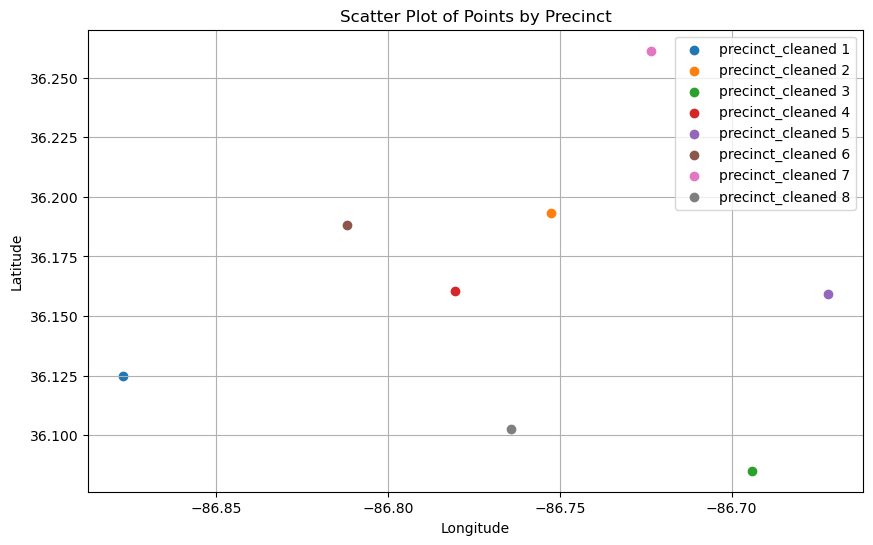

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

for precinct in c['precinct_cleaned'].unique():
    plt.scatter(c[c['precinct_cleaned'] == precinct]['m_lng'],
                c[c['precinct_cleaned'] == precinct]['m_lat'],
                label=f'precinct_cleaned {precinct}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Points by Precinct')
plt.legend()
plt.grid(True)
plt.show()



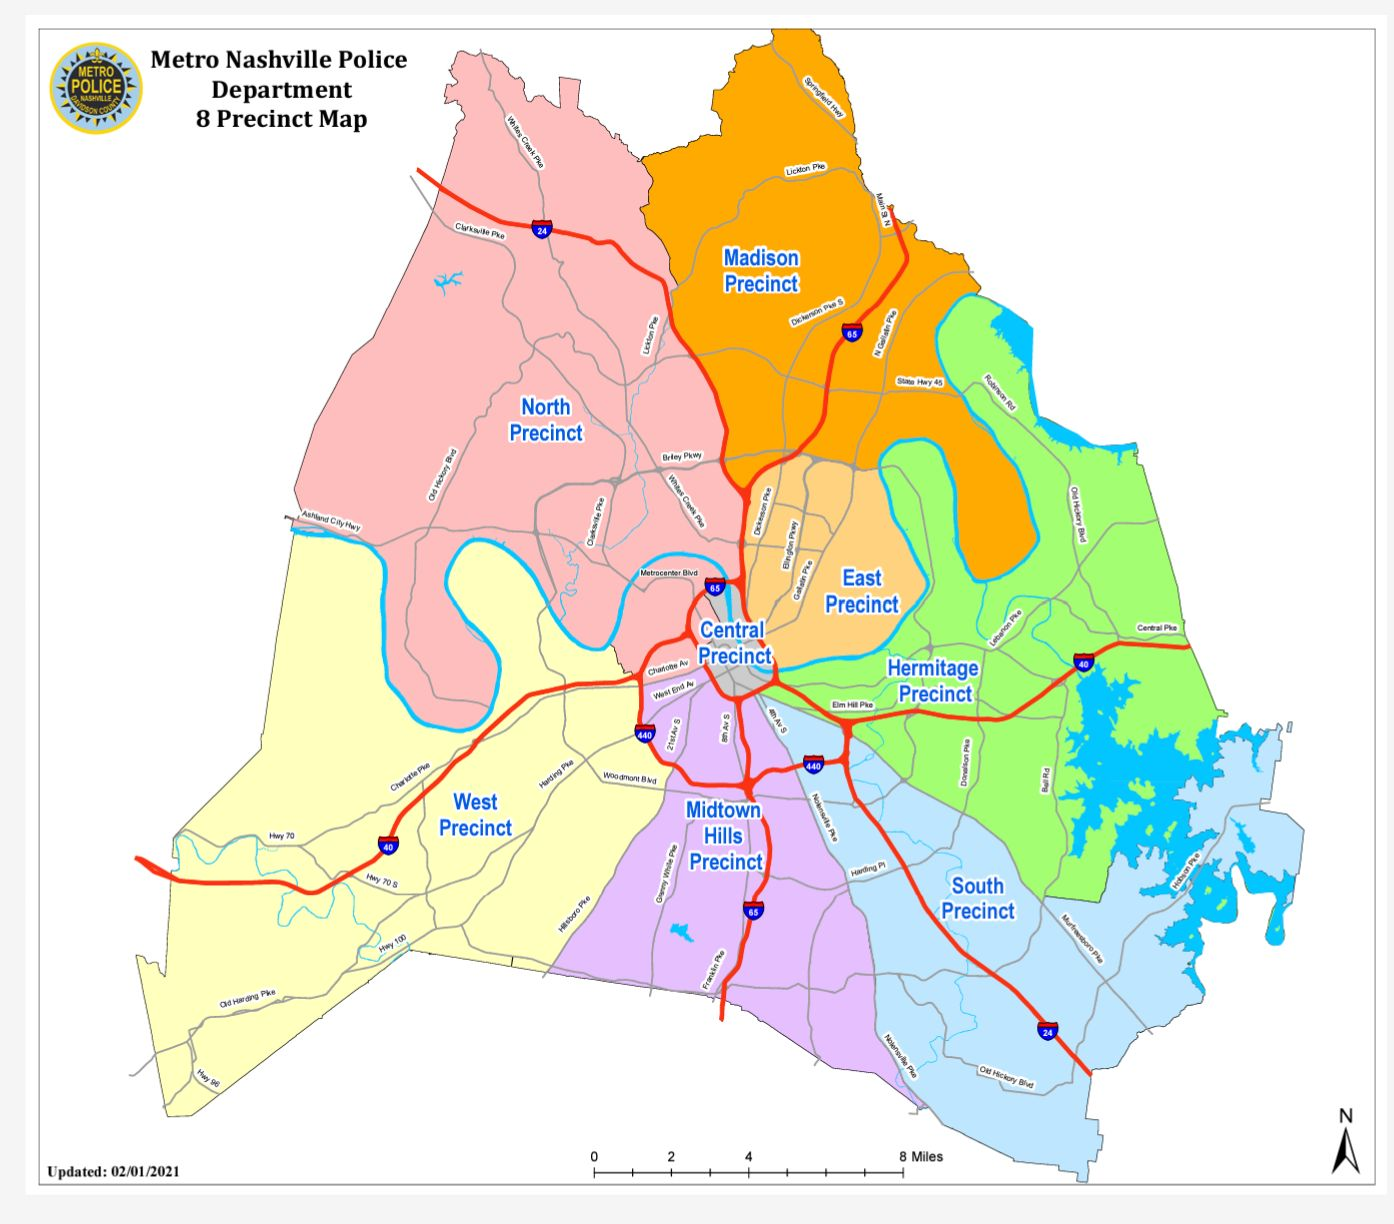



The maps obtained from the Nashville PD are:


By comparing the plot with the maps, we conclude that:


*   1 - West
*   2 - East
- 3 - South
- 4 - Central
- 5 - Hermitage
- 6 - North
- 7 - Madison
- 8 - Midtown

Based on the above locations, it seems possible that the high number of stops by precinct 8 could be due to its geographic location which is very close the center on the city.


#### *Analysis by Precinct*

In [ ]:
df2 = df2[df2['year'] != 'unknown']
df2['year'] = df2.loc[:,'year'].astype(int)

In [ ]:
gd = df2.groupby(['precinct','year'])
search_pre = gd.apply(search_rate).reset_index(name = 'search_rate')

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/4024567015.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  search_pre = gd.apply(search_rate).reset_index(name = 'search_rate')


In [ ]:
search_pre_cht = alt.Chart(search_pre[search_pre['precinct'] != -1 ]).mark_line().encode(
    x = 'year:N',
    y = 'search_rate:Q',
    color = 'precinct:N',
).properties(title='SEARCH RATES(%) BY PRECINCT', width=300,height=300)

search_cht = alt.Chart(search_pre[search_pre['precinct'] != -1]).mark_line().encode(
    x = 'year:N',
    y = 'mean(search_rate):Q',
).properties(title = 'AVERAGE SEARCH RATES(%)',width=300,height=300)

search_cht | search_pre_cht

alt.HConcatChart(...)

**Analysis**
The search for Precinct 7 are abnormally high from 2012 - 2018 and remain to be the highest amongst all for this time period. We will take a closer look at precinct 7 for the next section

In [ ]:
contra_pre = gd.apply(contraband_rate).reset_index(name = 'contraband_rate')

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/1390072726.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  contra_pre = gd.apply(contraband_rate).reset_index(name = 'contraband_rate')


In [ ]:
contra_pre_cht = alt.Chart(contra_pre[contra_pre['precinct'] != -1]).mark_line().encode(
    x = 'year:N',
    y = 'contraband_rate:Q',
    color = 'precinct:N',
).properties(title = 'CONTRABAND HIT RATES(%) BY PRECINCT', width=300,height=300)

contra_cht = alt.Chart(contra_pre[contra_pre['precinct'] != -1]).mark_line().encode(
    x = 'year:N',
    y = 'mean(contraband_rate):Q',
).properties(title = 'AVERAGE CONTRABAND HIT RATES(%)',width=300,height=300)

contra_cht | contra_pre_cht

alt.HConcatChart(...)

**Analysis**
There no abnormalities observed through the graph above.
The conclusion to be drawn here is that we see a general increase in the contraband hit rate over the years meaning:
- Out of 100 sampled searches taken from the data set a higher number of people possed contraband in 2016 when compared to 2010. An increase of 8 percentage points is observed

#### *Analysing stats for precinct 7*
Since the search rates for precinct 7 were abnormally high post 2012 we take a deeper dive into the stats for it

In [ ]:
df2.year.dtype

dtype('int64')

In [ ]:
precinct_7 = df2[(df2['precinct'] == 7) & (df2['year'] >= 2012)]
grp_7 = precinct_7.groupby(['year','subject_race'])
count_7 = grp_7.size().reset_index(name='count')
search_7 = grp_7.apply(search_rate).reset_index(name='search_rate')
contra_7 = grp_7.apply(contraband_rate).reset_index(name='contraband_rate')
frisk_7 = grp_7.apply(frisk_rate).reset_index(name='frisk_rate')

/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/1929329672.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  search_7 = grp_7.apply(search_rate).reset_index(name='search_rate')
/var/folders/76/0bx0hwcx2cjcbnlskzx9lvhm0000gn/T/ipykernel_11488/1929329672.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  contra_7 = grp_7.apply(contraband_rate).reset_index(name='contraband_rate')
/var/folde

**Stop By Race**



In [ ]:
count_7_cht = alt.Chart(count_7[count_7['subject_race'] != 'unknown']).mark_line().encode(
    x = 'year:N',
    y = 'count:Q',
    color = 'subject_race:N',
).properties(title = 'NUMBER OF STOPS BY RACE (PRECINCT 7)', width=600,height=400)
count_7_cht

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

The number of stops is much higher for the white and black category which is proportional to their larger population size


Nashville, Tennessee Population 2024:
World Population Review
- White: 59.13%
- Black or African American: 26.81%
- Two or more races: 6.4%
- Other race: 3.84%
- Asian: 3.63%
- Native American: 0.14%
- Native Hawaiian or Pacific Islander: 0.05%

Source:
https://worldpopulationreview.com/us-cities/nashville-tn-population

##### *Frisk Rates By Race*

In [ ]:
frisk_7_cht = alt.Chart(frisk_7[
                        (frisk_7['subject_race'] != 'unknown') &
                        (frisk_7['frisk_rate'] != 0)]).mark_line().encode(
    x = 'year:N',
    y = 'frisk_rate:Q',
    color = 'subject_race:N',
).properties(title = 'FRISK RATES(%) BY RACE (PRECINCT 7)', width=600,height=400)
frisk_7_cht

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

CONCLUSIONS:
- No significant difference observed for frisk rates between different races
- Frisk rates start dropping significantly around 2013

##### *Search Rates By Race*

In [ ]:
search_7_cht = alt.Chart(search_7[
                         (search_7['subject_race'] != 'unknown') &
                         (search_7['search_rate'] != 0)]).mark_line().encode(
    x = 'year:N',
    y = 'search_rate:Q',
    color = 'subject_race:N',
).properties(title = 'SEARCH RATES(%) BY RACE (PRECINCT 7)', width=600,height=400)
search_7_cht

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

CONCLUSIONS:
- Asians have a much lower chance of being search for in a traffic policing stop
   - This may be attributed to their lower population size

##### *Contraband Hit Rates By Race*

In [ ]:
contra_7_cht = alt.Chart(contra_7[
                         (contra_7['subject_race'] != 'unknown') &
                         (contra_7['contraband_rate'] != 0)]).mark_line().encode(
    x = 'year:N',
    y = 'contraband_rate:Q',
    color = 'subject_race:N',
).properties(title = 'CONTRABAND HIT RATES(%) BY RACE (PRECINCT 7)', width=600,height=400)
contra_7_cht

/Users/nirvikgill/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

CONCLUSION
- Surprisingly high rates of contraband being found in asians/ pacific islanders only in 2014 and 2015, these are the only two years when a contraband was found on asian/ pacific islanders



---



# **Conclusion and Future Work**

From our analyses, it looks like the decrease in the number of trafic stops made by the Nashville PD was following the 2013 backlash, although some delayed effect can be noticed. The frisks performed, arrests made and contraband found have gone down as well. But the ratio for arrests made and contraband found to the total stops performed have steadily increased, indicating that the reduction in stops didn't seem to affect these areas. While one could argue that there is an element of reverse causality here; a general reduction in crime as a result of the strict policing strategies acting as a deterrant leading to laxer police startegies, further analysis could shed some light into the true effects.

As per for evidence for racial discrimination, the search rate graphs hint to the fact that there is discrumination against black and hispanice people. It cannot be conclusively said that the cause is racial discrimination but there is reason to believe that it might be the case. Further research into analysing why this difference is observed by comparing to census statistics will help make a stronger case.

For the geographic analysis it is clear that the strategies differ by precincts as can be seen in the search rates for precicnt 7.